In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1.5
mpl.rcParams['figure.dpi'] = default_dpi * factor

Исходные данные

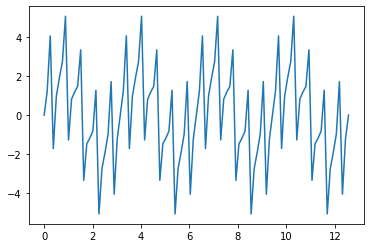

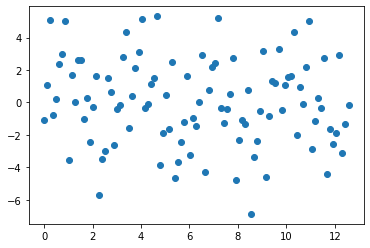

In [263]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + np.tan(x * 5 ) #+ np.sin(x * 25.5)

n = len(x)

#print (x/(np.pi * 2))

yd = np.zeros(len(x))

plt.plot(x, y);
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o');

In [264]:
n = len(x)

In [265]:
n

101

In [266]:
kernel = np.ones(5)

In [267]:
kernel

array([1., 1., 1., 1., 1.])

In [268]:
kernel = kernel/sum(kernel)

In [269]:
kernel

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [270]:
kernel_padded = np.pad(kernel, n)[n:]

In [271]:
np.roll(kernel_padded,-len(kernel)+1)

array([0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2,
       0.2, 0.2])

In [272]:
len(kernel_padded)

106

In [273]:
kernel

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [274]:
def convolve(signal, window):
    n= len(signal)
    n_w = len(window)
    kernel = np.pad(window, n - n_w + n)[n - n_w + n:]
    kernel_rolled = np.roll(kernel, -n_w // 2)
    convolved = np.zeros(n)
    

    for i in range(0,n-1):
        convolved[i] = 0.

        for k in range(0,n-1):

            convolved[i] = convolved[i] + signal[k]*kernel_rolled[i-k]
 
    
    return convolved
            
    
    
    
    

In [275]:
y_c = convolve(yd,kernel)

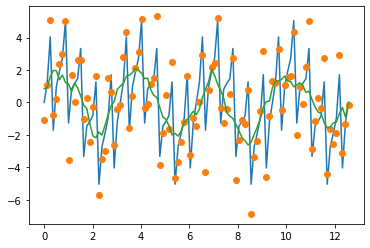

In [276]:
plt.plot(x,y)
plt.plot (x, yd, 'o');
plt.plot (x, y_c[:len(x)]);

In [277]:
kernel2 = np.ones(3)

In [278]:
kernel2 /= sum(kernel2)

In [279]:
kernel2

array([0.33333333, 0.33333333, 0.33333333])

In [280]:
y_c2 = convolve(yd,kernel2)

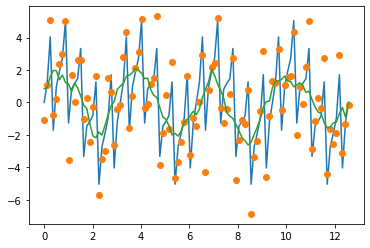

In [281]:
plt.plot(x,y)
plt.plot (x, yd, 'o');
plt.plot (x, y_c[:len(x)]);

In [282]:
def make_kernel(kernel):
    kernel /= sum(kernel)
    return kernel

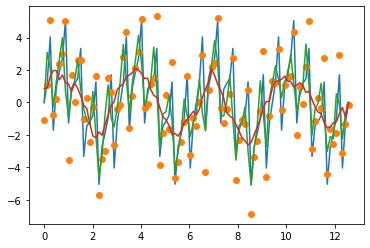

In [283]:
plt.plot(x,y)
plt.plot (x, yd, 'o');
plt.plot (x, convolve(yd,make_kernel(np.ones(2))));
plt.plot (x, convolve(yd,make_kernel(np.ones(5))));

Вывод: чем меньше размер окна, тем менее сглаживается

Попробуем синусоидальное окно

In [304]:
kernel_sin = np.arange(-2,5//2)
kernel_sin = np.pi * kernel_sin / (len(kernel_sin ) - 1)

In [305]:
kernel_sin

array([-2.0943951 , -1.04719755,  0.        ,  1.04719755])

In [306]:
kernel_sin = np.apply_along_axis(np.sin,0,kernel_sin)

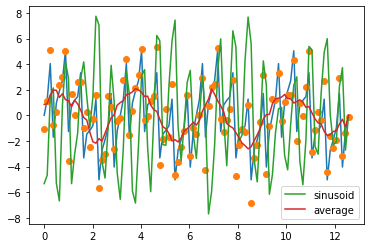

In [307]:
plt.plot(x,y)
plt.plot (x, yd, 'o');
plt.plot (x, convolve(yd,kernel_sin),label='sinusoid');
plt.plot (x, convolve(yd,make_kernel(np.ones(5))),label='average')
plt.legend()

# Автокоррелляция

In [320]:
def serial_correlation(signal,lag=1):
    
    n = len(signal)
    avg = np.sum(signal) / n
    y1 = signal[lag:]
    y2 = signal[:n-lag]
    corr  = 0.
    for i in range(0,n-lag-1):
        corr = corr + (y1[i] - avg)*(y2[i] - avg)/(n-lag-1)
    return corr
    

In [321]:
serial_correlation([1,1,2,2,3,3,4,4],lag=1)

0.6666666666666666

In [324]:
def auto_corr(signal):
    lags = np.arange(len(signal)//2)
    corrs = [serial_correlation(signal,lag) for lag in lags]
    corrs /= corrs[0]
    return lags, corrs
    

In [325]:
auto_corr([1,1,2,2,3,3,4,4])

(array([0, 1, 2, 3]),
 array([ 1.        ,  0.60215054,  0.31612903, -0.22580645]))

In [326]:
x = np.linspace(0, np.pi*4,101)

In [338]:
y = 0. + np.sin(x*2) * np.sin(x*2)

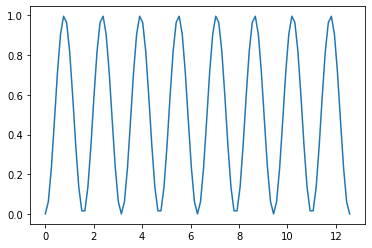

In [339]:
plt.plot(x, y);

In [341]:
lags,corrs = auto_corr(y)

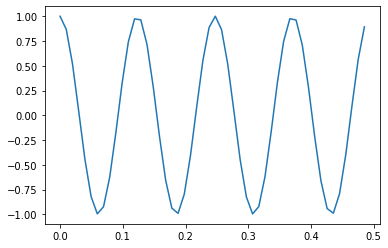

In [343]:
plt.plot(lags/101,corrs)

Вывод коррелиционная функция синусоид представляет собой косинусоиду

# Оконное преобразование Фурье

In [369]:
yv[(xv>np.pi*2) & (xv<np.pi*4)]

array([0.40617594, 1.24922197, 1.86542667])

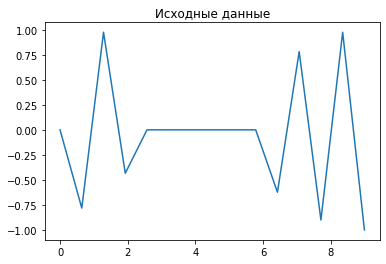

In [383]:
xv = np.linspace(0, np.pi * 9, 15)
nv = len(xv)
Lv = max(xv) - min(xv)
yv = 0. + np.exp(np.cos(xv*2))
yv[xv > np.pi* 4] = 0
yv[xv > np.pi* 6] = 1. * np.cos(xv [xv > np.pi* 6]* 11)
yv[(xv>np.pi*2) & (xv<np.pi*4)] = 0

yv[xv<np.pi*2] =1. * np.sin(xv [xv <np.pi*2]*2)
Bv = np.zeros ((nv))

dxv = Lv / (nv-1)

xwv = np.linspace(-Lv, Lv, len(Winv))

Winv = np.zeros ((2*nv-1))

WinSizev = np.pi/2 #L #/3

Winv[abs(xwv)<WinSizev] = 1.






plt.plot(xv/np.pi, yv)
plt.title('Исходные данные');

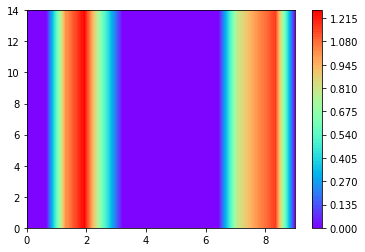

In [384]:
nfv = 15 #частоты для которых будем строить спектрограмму

a2v = np.zeros((nv,nfv))
b2v = np.zeros((nv,nfv))
A2v = np.zeros((nv,nfv))

Freqv = np.zeros ((len(xv)))
Shiftv = np.zeros ((len(xv)))

CosTermv = np.zeros ((len(xv)))
SinTermv = np.zeros ((len(xv)))

for k in range (0,nfv):
    
    Freqv [k] = k

    for s in range (0,nv-1):
        
        Shiftv[s] = s
    
        a2v[s,k]=0.
        b2v[s,k]=0.
       
        for i in range (0,nv-1):
    
            a2v[s,k] +=  2./ WinSizev /2 * yv[i] * Winv[i-s+nv] * np.cos(2*np.pi*xv[i]/Lv * k) * dxv 
            b2v[s,k] +=  2./ WinSizev /2 * yv[i] * Winv[i-s+nv] * np.sin(2*np.pi*xv[i]/Lv * k) * dxv
        
                                   
A2v = (a2v**2+b2v**2)**0.5 


plt.figure()
plt.contourf(xv/np.pi, Freqv[0:15], A2v.T, 100, cmap='rainbow')
plt.colorbar();

На спектрограмме там, где в исходном ряде нулевые значения, можем наблюдать низкие амплитуды. Наоборот, там, где высокие значения в исходном ряде, можем наблюдать преобладание высоких амплитуд.